<a href="https://colab.research.google.com/github/Jamil-04/Machine-Learning/blob/main/Regression%20Model%20Multiple%20Linear%20Regression%20pada%2050_Startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load dataset
# Upload file 50_Startups.csv ke Google Colab terlebih dahulu
from google.colab import files
uploaded = files.upload()

# Membaca dataset
df = pd.read_csv('50_Startups.csv')

# Menampilkan 5 baris pertama dataset
df.head()

# Kesimpulan Step 1:
# Dataset 50_Startups.csv berhasil di-load. Dataset ini terdiri dari fitur-fitur: "R&D Spend", "Administration", "Marketing Spend", "State", dan target "Profit".


Saving 50_Startups.csv to 50_Startups.csv


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [2]:
# Step 2: Memisahkan fitur dan target
X = df.iloc[:, :-1].values  # Semua kolom kecuali yang terakhir (Profit)
y = df.iloc[:, -1].values  # Kolom terakhir (Profit)

# Menangani fitur kategorikal (State)
# Menggunakan OneHotEncoder untuk mengubah State menjadi variabel dummy
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# Kesimpulan Step 2:
# Fitur kategorikal "State" telah diubah menjadi variabel dummy menggunakan OneHotEncoder.
# Dataset sekarang siap digunakan untuk pemodelan.


In [3]:
# Step 3: Memisahkan dataset menjadi training set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Kesimpulan Step 3:
# Dataset telah dipisahkan menjadi training set (80%) dan test set (20%).


In [4]:
# Step 4: Membuat model Multiple Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)  # Melatih model

# Memprediksi hasil untuk test set
y_pred = regressor.predict(X_test)

# Menampilkan hasil prediksi vs nilai aktual
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_results)

# Kesimpulan Step 4:
# Model Multiple Linear Regression telah dibangun menggunakan data training, dan prediksi telah dibuat untuk test set.
# Hasil prediksi dibandingkan dengan nilai profit aktual pada test set.


      Actual      Predicted
0  103282.38  103015.201598
1  144259.40  132582.277608
2  146121.95  132447.738452
3   77798.83   71976.098513
4  191050.39  178537.482211
5  105008.31  116161.242302
6   81229.06   67851.692097
7   97483.56   98791.733747
8  110352.25  113969.435330
9  166187.94  167921.065696


In [5]:
# Step 5: Menampilkan hasil model

# Koefisien model
print("Koefisien (Coefficients):", regressor.coef_)
print("Intercept:", regressor.intercept_)

# Menghitung Mean Squared Error (MSE) dan R-squared (R2 Score)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2 Score):", r2)

# Kesimpulan Step 5:
# Koefisien dan Intercept dari model telah dihitung. Model ini menghasilkan Mean Squared Error (MSE) dan R2 Score untuk menilai performa model.
# R-squared menunjukkan seberapa baik model dapat menjelaskan variabilitas profit berdasarkan pengeluaran.


Koefisien (Coefficients): [ 8.66383692e+01 -8.72645791e+02  7.86007422e+02  7.73467193e-01
  3.28845975e-02  3.66100259e-02]
Intercept: 42467.52924853278
Mean Squared Error (MSE): 83502864.03256194
R-squared (R2 Score): 0.9347068473282546


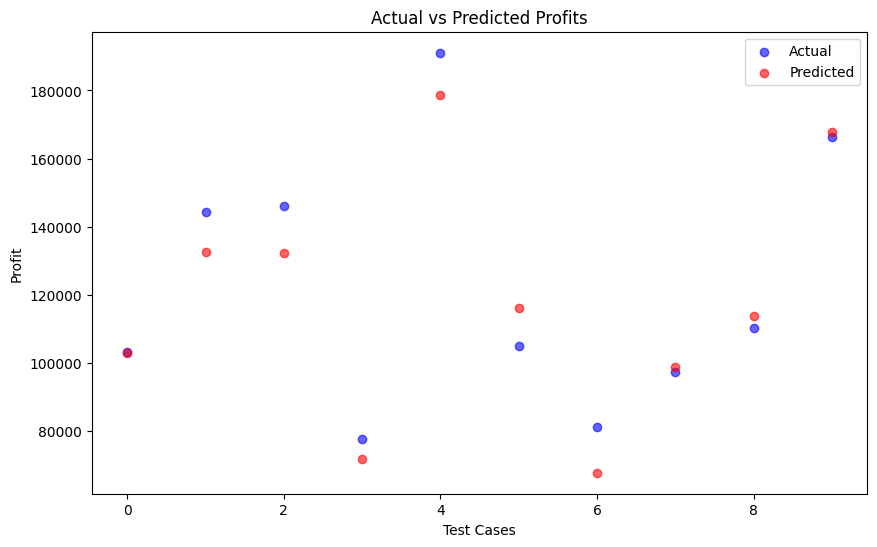

In [7]:
# Step 6: Visualisasi Prediksi vs Nilai Aktual menggunakan scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)  # Nilai aktual (titik-titik biru)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', alpha=0.6)  # Nilai prediksi (titik-titik merah)
plt.title('Actual vs Predicted Profits')
plt.xlabel('Test Cases')
plt.ylabel('Profit')
plt.legend()
plt.show()

# Kesimpulan Step 6:
# Grafik ini menunjukkan perbandingan antara profit yang diprediksi oleh model dan profit aktual pada test set menggunakan titik-titik.
